In [1]:
#Linear algebra
import numpy as np 
#Data processing, CSV file
import pandas as pd 
#Interface with the underlying operating
import os

In [2]:
train_labels = pd.read_csv('C:/Users/MSSi/Desktop/dataset/train_labels.csv', dtype=str)

print('Training Shape:',train_labels.shape)
print('Input example :')
train_labels.head()

Training Shape: (220025, 2)
Input example :


,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [3]:
train_labels['label'].value_counts()

0    130908
1     89117
Name: label, dtype: int64

In [4]:
train_labels.describe()

,id,label
count,220025,220025
unique,220025,2
top,f38a6374c348f90b587e046aac6079959adf3835,0
freq,1,130908


In [5]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220025 entries, 0 to 220024
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      220025 non-null  object
 1   label   220025 non-null  object
dtypes: object(2)
memory usage: 3.4+ MB


In [6]:
train_labels['label'] = train_labels['label'].astype(float)

In [7]:
print('Training samples: ',len(os.listdir('C:/Users/MSSi/Desktop/dataset/train/')))
print('Test samples: ',len(os.listdir('C:/Users/MSSi/Desktop/dataset/test/')))

TrainProportion = len(os.listdir('C:/Users/MSSi/Desktop/dataset/train/'))/ (len(os.listdir('C:/Users/MSSi/Desktop/dataset/test/')) + len(os.listdir('C:/Users/MSSi/Desktop/dataset/train/')))

print('Proportion of data in Train set: ',TrainProportion)
print('Proportion of data in Test set: ',1- TrainProportion)

Training samples:  220025
Test samples:  57458
Proportion of data in Train set:  0.7929314588641466
Proportion of data in Test set:  0.20706854113585338


     Label Counts
0.0        130908
1.0         89117


<AxesSubplot: title={'center': 'Distribution of Binary Classes'}>

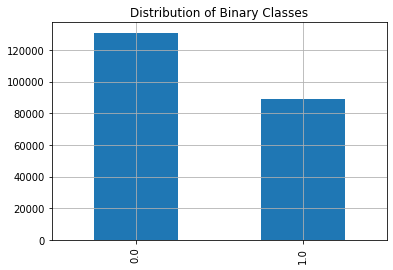

In [8]:
# Establish distribution of training labels
print(pd.DataFrame(data={'Label Counts':train_labels['label'].value_counts()}))
train_labels['label'].value_counts().plot(kind='bar',grid=True,title='Distribution of Binary Classes')

In [9]:
#Display data before taking equal
import plotly.express as px
fig = px.pie(train_labels, 
             values = train_labels['label'].value_counts().values, 
             names = train_labels['label'].unique())
fig.update_layout(
    title={
        'text': "Label shown in Pie Chart",
        'y':.50,
        'x':0.3,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [10]:
# Make occurence of 0s equivalent to 1s in the training data
train_pos = train_labels[train_labels['label'] == 1]
train_neg = train_labels[train_labels['label'] == 0]
train_neg = train_neg.sample(n = len(train_pos))

# Check new sizes
print(len(train_neg))
print(len(train_pos))

89117
89117


In [11]:
# Concat two datasets, confirm new set is balance w/ Pie chart
train_bal = pd.concat([train_neg,train_pos]).sample(frac=1, random_state=42).reset_index(drop=True)
train_bal.head()

fig = px.pie(train_bal, 
             values = train_bal['label'].value_counts().values, 
             names = train_bal['label'].unique())
fig.update_layout(
    title={
        'text': "Label shown in Pie Chart",
        'y':.50,
        'x':0.3,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

Shape of image: (96, 96, 3)


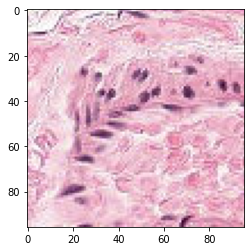

In [12]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread(f'C:/Users/MSSi/Desktop/dataset/train/{train_bal.iloc[1,0]}.tif')
imgplot = plt.imshow(img)

print('Shape of image:', img.shape)

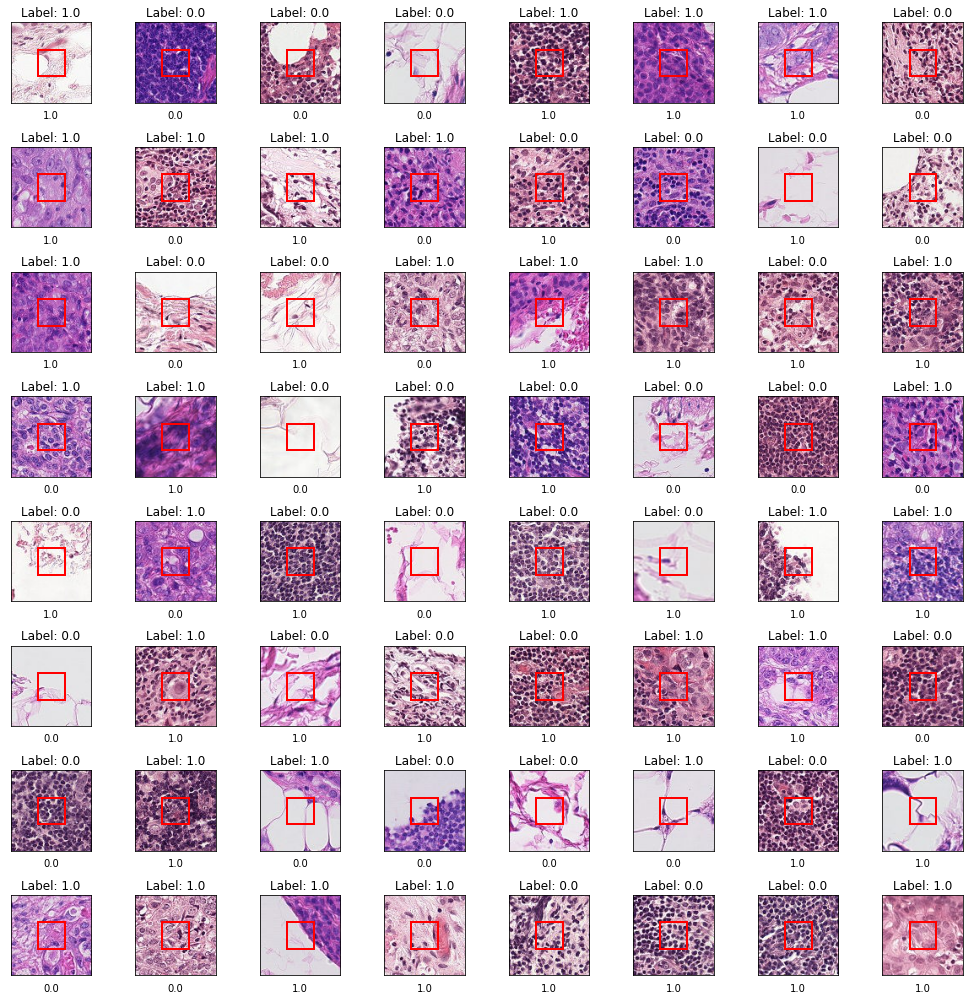

In [13]:
import matplotlib.patches as patches
import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)

rndm_img = np.random.choice(train_bal.index,64)
fig, ax = plt.subplots(8, 8,figsize=(14,14))

for i in range(0, rndm_img.shape[0]):
    ax = plt.subplot(8, 8, i+1)
    img = mpimg.imread(f'C:/Users/MSSi/Desktop/dataset/train/{train_bal.iloc[rndm_img[i],0]}.tif')
    ax.imshow(img)
    label = train_bal.iloc[rndm_img[i],1]
    ax.set_title('Label: %s'%label)
    box = patches.Rectangle((32,32),32,32, linewidth=2, edgecolor='r',facecolor='none', linestyle='-')
    ax.add_patch(box)
    ax.set(xticks=[], yticks=[], xlabel = train_bal.label[i]);
    
plt.tight_layout()

In [16]:
# Split the Data
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(train_bal, test_size=0.2, random_state=42, 
                                      stratify=train_bal.label)

In [17]:
# Create labels for model
# Train
train_df['id'] = train_df['id']+'.tif'
train_df['label'] = train_df['label'].astype(str)
print(train_df.shape)
# Test
val_df['id'] = val_df['id']+'.tif'
val_df['label'] = val_df['label'].astype(str)

(142587, 2)


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# To adjust pixel contents between -1/1
train_datagen=ImageDataGenerator(dtype=tf.float32) 

train_generator=train_datagen.flow_from_dataframe(dataframe=train_df, directory="C:/Users/MSSi/Desktop/dataset/train/",
                x_col="id",y_col="label",batch_size=64,seed=42,shuffle=True,
                class_mode="binary",target_size=(96,96))

valid_generator=train_datagen.flow_from_dataframe(dataframe=val_df, directory="C:/Users/MSSi/Desktop/dataset/train/",
                x_col="id",y_col="label",batch_size=64,seed=42,shuffle=True,
                class_mode="binary",target_size=(96,96))

Found 142587 validated image filenames belonging to 2 classes.
Found 35647 validated image filenames belonging to 2 classes.


In [19]:
train_step=train_generator.n//train_generator.batch_size
val_step=valid_generator.n//valid_generator.batch_size

print(train_step)

2227


In [20]:
# Setup GPU accelerator - configure Strategy. Assume TPU...if not set default for GPU/CPU
tpu = None
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError:
    strategy = tf.distribute.get_strategy()

In [25]:
# build first model like first but with hyperparameters and optimizer(s)
from tensorflow.keras import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.core import Dense,Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

ROC_1 = tf.keras.metrics.AUC()
base_learning_rate = 0.0001
batch_size=64
with strategy.scope():
    
    #create model
    model_first = Sequential()
    
    model_first.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
    model_first.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
    model_first.add(MaxPooling2D(pool_size=(2,2)))
    model_first.add(Dropout(0.2))
    
    model_first.add(BatchNormalization())
    model_first.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model_first.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model_first.add(AveragePooling2D(pool_size=(2,2)))
    model_first.add(Dropout(0.2))
    
    model_first.add(BatchNormalization())
    model_first.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model_first.add(Flatten())
    model_first.add(Dense(1, activation='sigmoid'))
    
    #build model by input size
    model_first.build(input_shape=(batch_size, 96, 96, 3))
    
    #compile
    adam_optimizer = Adam(base_learning_rate)
    model_first.compile(loss='binary_crossentropy', metrics=['accuracy', ROC_1], optimizer=adam_optimizer)

#quick look at model
model_first.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (64, 94, 94, 32)          896       
                                                                 
 conv2d_6 (Conv2D)           (64, 92, 92, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (64, 46, 46, 32)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (64, 46, 46, 32)          0         
                                                                 
 batch_normalization_2 (Batc  (64, 46, 46, 32)         128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (64, 44, 44, 64)         

In [26]:
EPOCHS = 10
# train model
history_model_two = model_first.fit(
                        train_generator,
                        steps_per_epoch=train_step,
                        validation_data=valid_generator,
                        validation_steps=val_step,
                        epochs = EPOCHS,)

Epoch 1/10
2227/2227 [==============================] - 1769s 794ms/step - loss: 0.4343 - accuracy: 0.8053 - auc_1: 0.8829 - val_loss: 0.4232 - val_accuracy: 0.8260 - val_auc_1: 0.9037
Epoch 2/10
2227/2227 [==============================] - 1618s 727ms/step - loss: 0.3805 - accuracy: 0.8345 - auc_1: 0.9116 - val_loss: 0.5822 - val_accuracy: 0.8282 - val_auc_1: 0.9123
Epoch 3/10
2227/2227 [==============================] - 1562s 701ms/step - loss: 0.3443 - accuracy: 0.8527 - auc_1: 0.9284 - val_loss: 0.7453 - val_accuracy: 0.8059 - val_auc_1: 0.8692
Epoch 4/10
2227/2227 [==============================] - 1487s 668ms/step - loss: 0.3056 - accuracy: 0.8723 - auc_1: 0.9439 - val_loss: 0.4031 - val_accuracy: 0.8627 - val_auc_1: 0.9249
Epoch 5/10
2227/2227 [==============================] - 1457s 654ms/step - loss: 0.2801 - accuracy: 0.8847 - auc_1: 0.9532 - val_loss: 0.4202 - val_accuracy: 0.8513 - val_auc_1: 0.9447
Epoch 6/10
2227/2227 [==============================] - 1689s 759ms/step - 

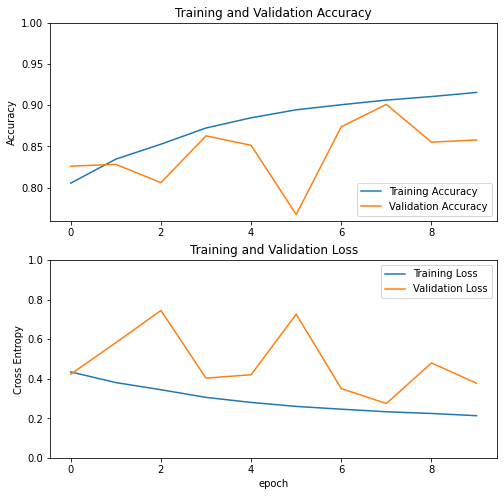

In [29]:
acc = history_model_two.history['accuracy']
val_acc = history_model_two.history['val_accuracy']

loss = history_model_two.history['loss']
val_loss = history_model_two.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [30]:
#Final model training with ResNet50
preprocess_input = tf.keras.applications.resnet.preprocess_input
IMG_SHAPE = (96, 96, 3)
base_model = tf.keras.applications.resnet50.ResNet50(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet',
                                               classes=2)

In [31]:
base_model.trainable = False
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 102, 102, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 48, 48, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 48, 48, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [32]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [33]:
prediction_layer = Dense(1)

In [34]:
inputs = tf.keras.Input(shape=IMG_SHAPE,dtype = tf.uint8)
x = tf.cast(inputs,tf.float32)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [35]:
model.compile(optimizer=Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
history_model= model.fit(train_generator,
                    steps_per_epoch=train_step,
                    validation_data=valid_generator,
                    validation_steps=val_step,
                    epochs=10, verbose=1
)

Epoch 1/10
2227/2227 [==============================] - 1755s 786ms/step - loss: 0.4791 - accuracy: 0.7768 - val_loss: 0.3591 - val_accuracy: 0.8379
Epoch 2/10
2227/2227 [==============================] - 1709s 767ms/step - loss: 0.3746 - accuracy: 0.8307 - val_loss: 0.3350 - val_accuracy: 0.8487
Epoch 3/10
2227/2227 [==============================] - 1708s 767ms/step - loss: 0.3526 - accuracy: 0.8422 - val_loss: 0.3240 - val_accuracy: 0.8589
Epoch 4/10
2227/2227 [==============================] - 1735s 779ms/step - loss: 0.3429 - accuracy: 0.8482 - val_loss: 0.3198 - val_accuracy: 0.8637
Epoch 5/10
2227/2227 [==============================] - 1745s 784ms/step - loss: 0.3365 - accuracy: 0.8507 - val_loss: 0.3156 - val_accuracy: 0.8636
Epoch 6/10
2227/2227 [==============================] - 1742s 782ms/step - loss: 0.3341 - accuracy: 0.8520 - val_loss: 0.3129 - val_accuracy: 0.8643
Epoch 7/10
2227/2227 [==============================] - 1758s 789ms/step - loss: 0.3313 - accuracy: 0.8533

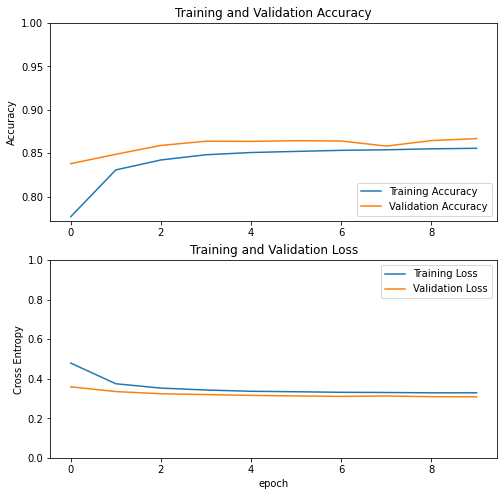

In [37]:
acc = history_model.history['accuracy']
val_acc = history_model.history['val_accuracy']

loss = history_model.history['loss']
val_loss = history_model.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [38]:
model.save('C:/Users/MSSi/Desktop/dataset/saved_model/my_model.h5')

In [68]:
 #Test Data - prepare generator

test_set = os.listdir('C:/Users/MSSi/Desktop/dataset/test')
test_df = pd.DataFrame(test_set)
test_df.columns = ['id']
test_df.head()

test_datagen=ImageDataGenerator(dtype=tf.float32)

test_generator=test_datagen.flow_from_dataframe(dataframe=test_df,directory="C:/Users/MSSi/Desktop/dataset/test",
                x_col="id",batch_size=64,seed=42,shuffle=False,
                class_mode=None,target_size=(96,96))

Found 57458 validated image filenames.


In [69]:
STEP_SIZE_TEST=test_generator.n
modelpreds = model.predict(test_generator,steps=STEP_SIZE_TEST, verbose = 1)

predictions = []
for pred in modelpreds:
    if pred >= 0.5:
        predictions.append(1)
    else:
        predictions.append(0)
submission = test_df.copy()
submission['id']=submission['id'].str[:-4] # Remove ".tif"
submission['label']=predictions
submission.head()

57458/57458 [==============================] - 590s 10ms/step


,id,label
0,00006537328c33e284c973d7b39d340809f7271b,1
1,0000ec92553fda4ce39889f9226ace43cae3364e,1
2,00024a6dee61f12f7856b0fc6be20bc7a48ba3d2,0
3,000253dfaa0be9d0d100283b22284ab2f6b643f6,1
4,000270442cc15af719583a8172c87cd2bd9c7746,0


In [70]:
submission.tail()

,id,label
57453,fffdd1cbb1ac0800f65309f344dd15e9331e1c53,0
57454,fffdf4b82ba01f9cae88b9fa45be103344d9f6e3,0
57455,fffec7da56b54258038b0d382b3d55010eceb9d7,0
57456,ffff276d06a9e3fffc456f2a5a7a3fd1a2d322c6,1
57457,ffffeb4c0756098c7f589b7beec08ef1899093b5,0


In [71]:
submission.to_csv('C:/Users/MSSi/Desktop/dataset/submission.csv',index=False)

In [72]:
model2 = tf.keras.models.load_model("C:/Users/MSSi/Desktop/dataset/saved_model/my_model.h5")

In [73]:
submission['label'].value_counts()

0    36844
1    20614
Name: label, dtype: int64

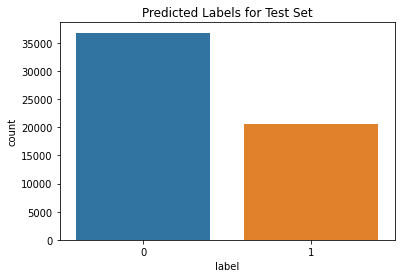

In [74]:
#plot test predictions
import seaborn as sns
sns.countplot(data=submission, x='label').set(title='Predicted Labels for Test Set');

In [88]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model_first.predict(valid_generator, train_step // batch_size)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(valid_generator.classes, y_pred))
print('Classification Report')
target_names = ['id', 'label']
print(classification_report(valid_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[17824     0]
 [17823     0]]
Classification Report
              precision    recall  f1-score   support

          id       0.50      1.00      0.67     17824
       label       0.00      0.00      0.00     17823

    accuracy                           0.50     35647
   macro avg       0.25      0.50      0.33     35647
weighted avg       0.25      0.50      0.33     35647



In [84]:
history_model_two.history['accuracy']

[0.8053156137466431,
 0.8344758152961731,
 0.8526623845100403,
 0.8723363876342773,
 0.8846923112869263,
 0.8944310545921326,
 0.9005844593048096,
 0.9062396883964539,
 0.9105197191238403,
 0.9155294299125671]